<a href="https://colab.research.google.com/github/YishaZukhrufin/MechineLearning/blob/main/30_3A_Yisha_Zukhrufin_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [23]:
image_files = [
    '/content/drive/MyDrive/dummy/dummy/A1.jpg',
    '/content/drive/MyDrive/dummy/dummy/B2129TZ_PNG.rf.bf5cbe951655269bb50fd5d924e95f8f.jpg',
    '/content/drive/MyDrive/dummy/dummy/B3326UB_png.rf.ae55e0c0bf99c732265edf021f844bf9.jpg',
    '/content/drive/MyDrive/dummy/dummy/34-E-2987-QC-10-18_jpeg.rf.206a77280b1253bcb19a884ee90c977e.jpg',
    '/content/drive/MyDrive/dummy/dummy/BA5757Y_png.rf.e4e7557f9e1bff8c2d6d1b986714f6ea.jpg'
]

k_values = [2, 4, 8, 16, 32]

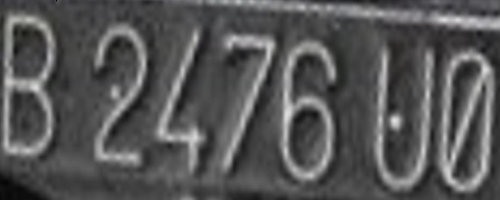

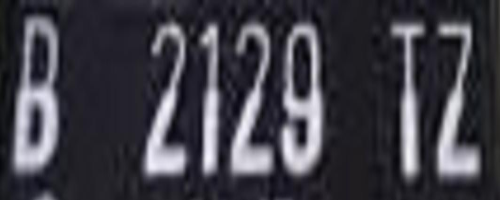

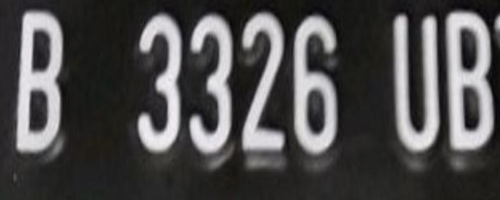

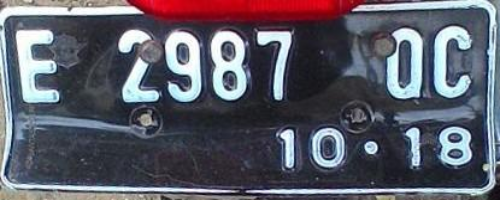

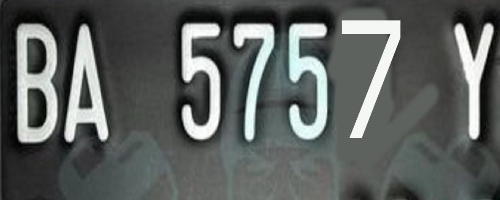

In [25]:
# Iterasi melalui setiap file gambar
for image_file in image_files:
    # Muat gambar
    img01 = cv2.imread(image_file)

    # Ubah ukuran gambar menjadi 500x500 piksel
    img01 = cv2.resize(img01, (500, 200))

    # Tampilkan gambar
    cv2_imshow(img01)

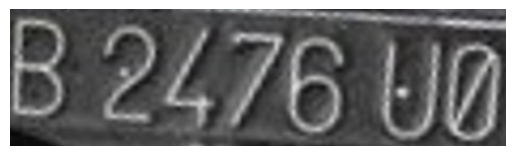

uint8


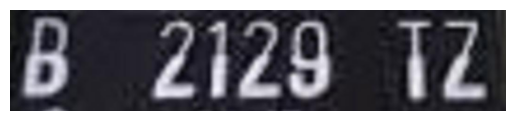

uint8


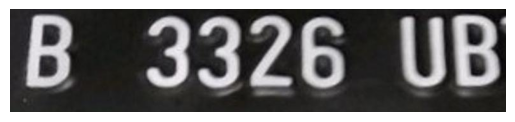

uint8


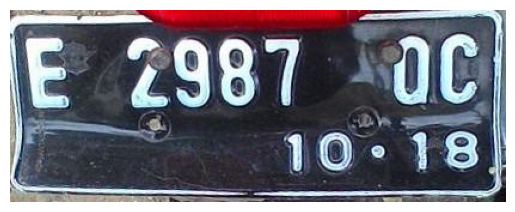

uint8


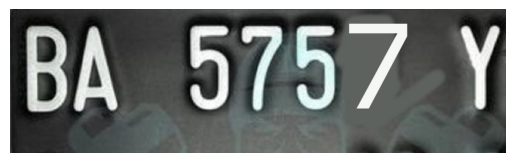

uint8


In [26]:
 # Tampilkan gambar
# Iterasi melalui setiap file gambar
for image_file in image_files:
    # Muat gambar
    img01 = cv2.imread(image_file)

    # Tampilkan gambar dalam format RGB dan menonaktifkan sumbu
    plt.imshow(cv2.cvtColor(img01, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print(img01.dtype)  # Output jenis data gambar

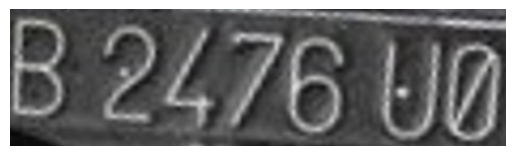

uint8


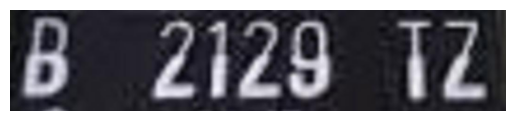

uint8


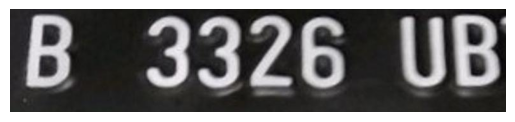

uint8


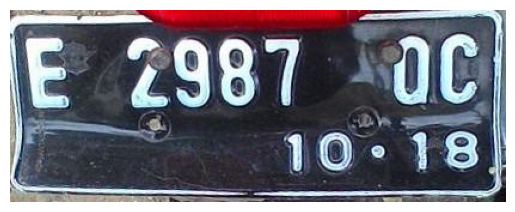

uint8


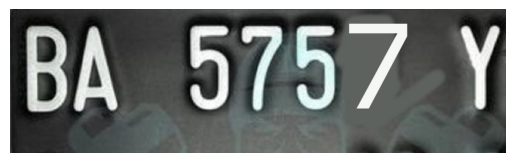

uint8


In [27]:
# Iterasi melalui setiap file gambar
for image_file in image_files:
    # Muat gambar
    img01 = cv2.imread(image_file)

    # Konversi BGR ke RGB
    img = cv2.cvtColor(img01, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dalam format RGB
    plt.imshow(img)
    plt.axis('off')  # Menonaktifkan sumbu
    plt.show()

    print(img.dtype)  # Output jenis data gambar

uint8
321
1163
3
float32 (373323, 3)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[0.5948325  0.59400076 0.5941761 ]
 [0.27890646 0.27815172 0.27837312]]
uint8
217
1064
3
float32 (230888, 3)
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0.16789897 0.13636053 0.14089586]
 [0.70879817 0.6664915  0.6719788 ]]
uint8
161
778
3
float32 (125258, 3)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[0.7738713  0.7617579  0.76861215]
 [0.14730693 0.14980447 0.15339549]]
uint8
161
415
3
float32 (66815, 3)
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[[0.27730665 0.22692294 0.24581324]
 [0.8856981  0.85870343 0.79127187]]
uint8
343
1183
3
float32 (405769, 3)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[0.8918315  0.90161234 0.87578356]
 [0.27757138 0.28465256 0.26964277]]


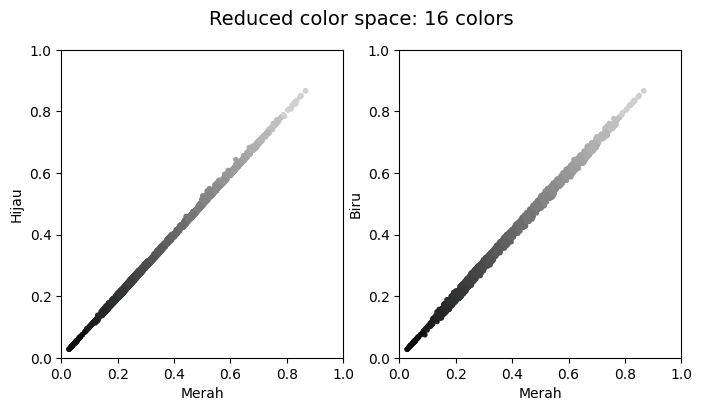

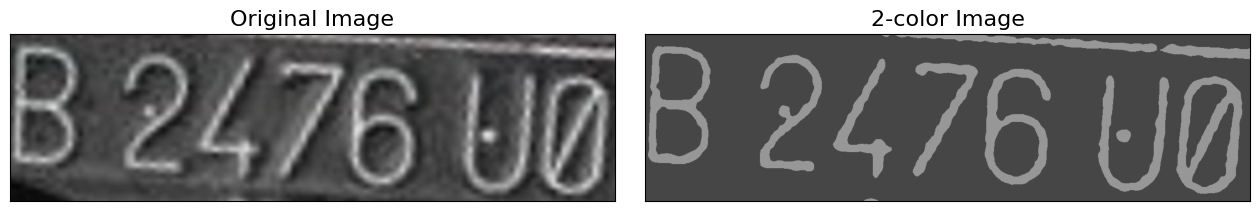

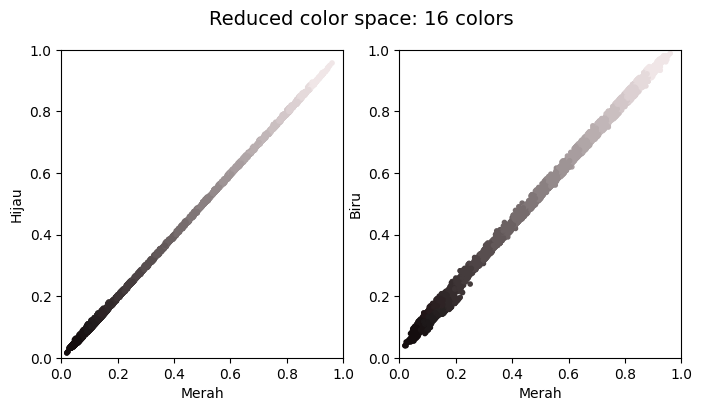

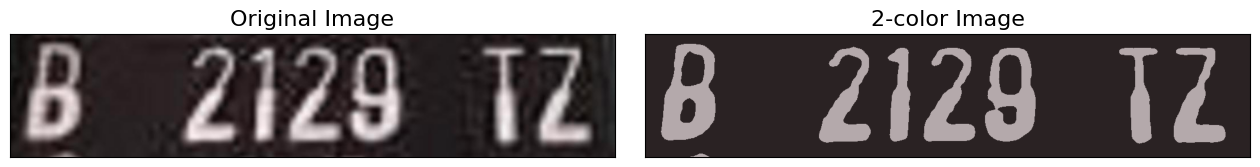

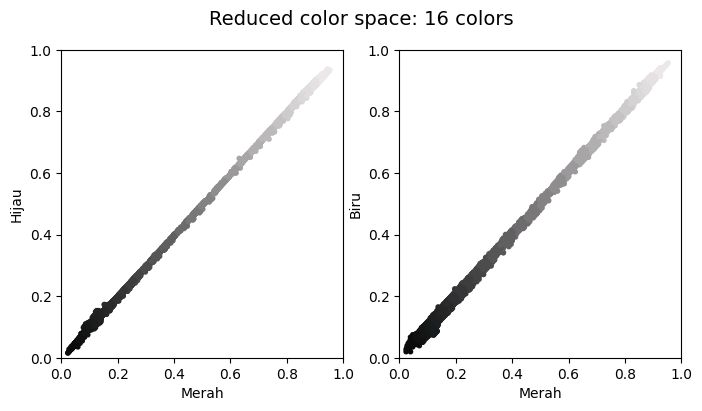

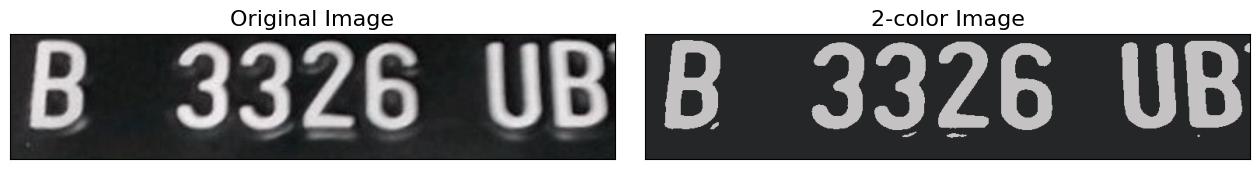

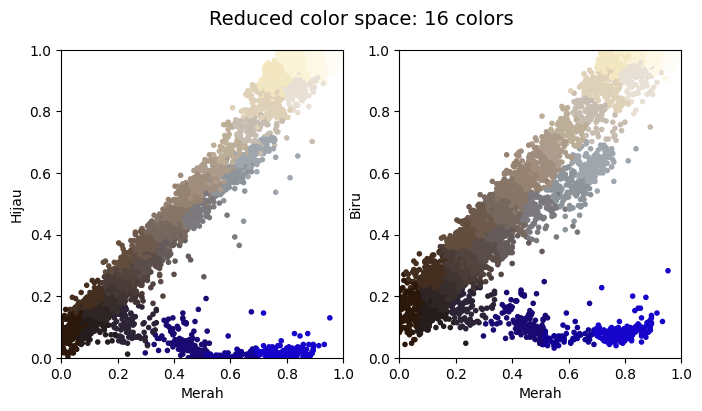

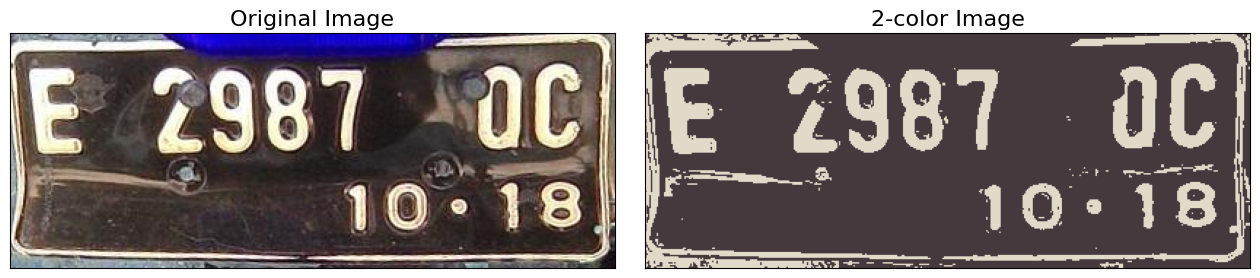

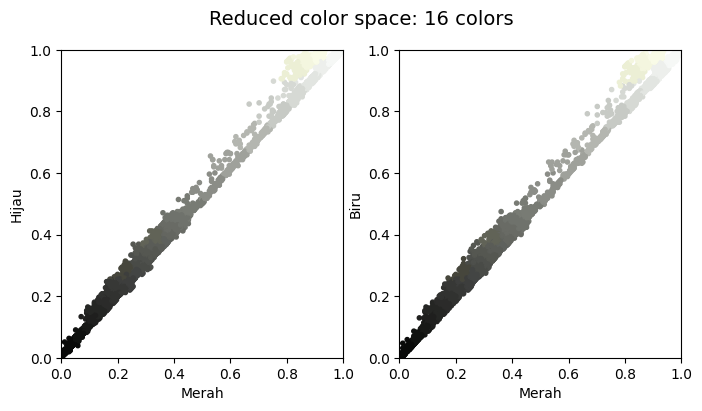

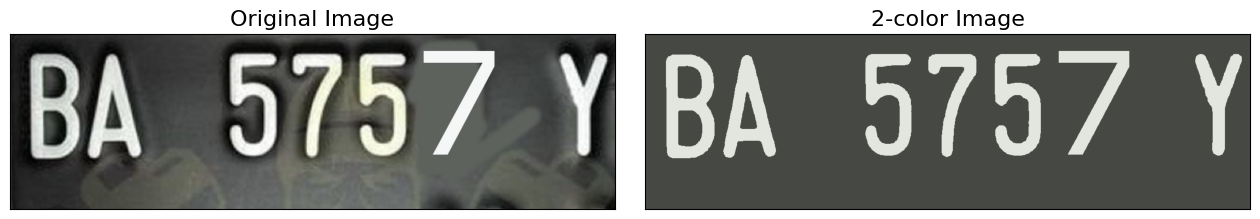

In [82]:
for image_file in image_files:
  img = cv2.imread(image_file)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB

  # Normalisasi data gambar
  data = img / 255.0

  print(img.dtype)#melihat tipe dan ukuran dari citra
  h, w, ch= img.shape
  print(h)
  print(w)
  print(ch)

  # Normalisasi data gambar
  data = img / 255.0

  # Flatten the data
  h, w, ch = img.shape
  data = data.reshape(h * w, ch)
  data.shape

  def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        B, G, R = data[i].T  # BGR format

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Merah', ylabel='Hijau', xlim=(0, 1), ylim=(0, 1))

        ax[1].scatter(R, B, color=colors, marker='.')
        ax[1].set(xlabel='Merah', ylabel='Biru', xlim=(0, 1), ylim=(0, 1))

        fig.suptitle(title, size=14)

  from sklearn.cluster import MiniBatchKMeans

  # Iterasi melalui daftar jumlah warna yang berbeda
  for i, k in enumerate(k_values):
    kmeans = MiniBatchKMeans(k)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

  plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

  #convert int menjadi float
  Z = np.float32(data)
  print(Z.dtype, Z.shape)

  #menentukan nilai k
  kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
  k=2
  ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

  print(label)
  print(center)

  segmented_data = center[label.flatten()]
  segmented_data

  segmented_image = segmented_data.reshape((img.shape))
  segmented_image

  img_recolored = new_colors.reshape(img.shape)

  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(img)
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(segmented_image)
  ax[1].set_title('2-color Image', size=16)
